# spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [45]:
# 필요한 모듈 불러오기
import pandas as pd
from nltk.corpus import stopwords
import string
from gensim.models import Word2Vec, FastText

## Load Data
- 보시면 spam.csv는 라벨이 있는 데이터예요. 물론 8주차 주체가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려볼 수도 있어요!

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [5]:
# v1별로 그룹바이해서 데이터 확인
#스팸의 개수가 적은것을 알 수 있다. 
display(spam.groupby('v1').describe())

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

## Tokenizing
- 실습코드는 물론 한국어 대상이라 konlpy를 다뤘지만, 슬라이드 보시면 영어는 nltk 모듈을 쓸 수 있어요. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋을 것 같아요!

In [6]:
import nltk

In [7]:
# Tokenizing과 stopwords제거를 한번에 수행함 

from nltk.stem import PorterStemmer
pst = PorterStemmer() #동사원형을 찾아주는 포터스테머사전사용

def process_text(text):
    
    # 문장부호제거
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # stopwords 제거 후 소문자로 변환 & 동사원형으로 바꿔줌
    cleaned_words = [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')] 
    cleaned_words2 = [i for i in cleaned_words if len(i)>1]
    cleaned_words3 = [pst.stem(i) for i in cleaned_words2 ]

    return cleaned_words3

data = spam['v2'].apply(process_text)
data.head()

0    [go, jurong, point, crazi, avail, bugi, great,...
1                            [ok, lar, joke, wif, oni]
2    [free, entri, wkli, comp, win, fa, cup, final,...
3                 [dun, say, earli, hor, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
Name: v2, dtype: object

* 원본데이터와 비교해보면 소문자, 동사원형으로 바뀐것을 알 수 있다.
* 한가지 아쉬운점은 PorterStemmer가 완벽하게 동사원형으로 바꾸지 못한다는 것이다. 마지막줄에 'goe'는 원래 'goes'인데 사전은 's'만 제거하는식이어서 아쉬웠다.(어근을 추출하는 다른 사전인 WordNetLemmatizer()도 사용해보았는데 PorterStemmer가 더나은것 같다고 판단하였다)

## Embedding & 본인이 도출해낸 해석을 적어주세요!

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었어요. 왜 이 임베딩 모델을 적용하게 되었는지 '비교' 결과와 함께 적어주세요!

In [8]:
# 임베딩 모델로 CBOW 모델 생성
Cbow_model = Word2Vec(data, size=2, window=3, min_count=4, workers=1, iter=1000, sg=0)
#주변의 3개의 단어로 유추하고, 최소4번이상 등장한 단어를 조건으로 주었다.

In [9]:
#index2word는 모델의 사전에 있는 단어 명을 담은 리스트
words = Cbow_model.wv.index2word # one-hot encoding 알아서 해줌 
words

['call',
 'im',
 'go',
 'get',
 'ur',
 'come',
 'dont',
 'ok',
 'ltgt',
 'free',
 'know',
 'like',
 'love',
 'want',
 'day',
 'ill',
 'got',
 'time',
 'good',
 'text',
 'send',
 'need',
 'one',
 'txt',
 'see',
 'today',
 'think',
 'home',
 'take',
 'lor',
 'repli',
 'stop',
 'tell',
 'sorri',
 'still',
 'back',
 'mobil',
 'make',
 'phone',
 'say',
 'new',
 'week',
 'work',
 'pleas',
 'later',
 'well',
 'da',
 'ask',
 'hi',
 'miss',
 'meet',
 'hope',
 'cant',
 'happi',
 'night',
 'claim',
 'wait',
 'thing',
 'tri',
 'much',
 'great',
 'oh',
 'give',
 'hey',
 'pl',
 'dear',
 'wat',
 'messag',
 'number',
 'friend',
 'thank',
 'way',
 'prize',
 'right',
 'feel',
 'that',
 'msg',
 'let',
 'pick',
 'alreadi',
 'even',
 'tomorrow',
 'ye',
 'realli',
 'yeah',
 'said',
 'min',
 'babe',
 'leav',
 'co',
 'amp',
 'care',
 'morn',
 'win',
 'didnt',
 'last',
 'sure',
 'servic',
 'life',
 'would',
 'keep',
 'cash',
 'find',
 'year',
 'contact',
 'ive',
 'anyth',
 'buy',
 'sleep',
 'lol',
 'tone',
 'l

In [10]:
# text 토큰 임베딩 벡터
vectors = Cbow_model.wv.vectors
vectors

array([[ 1.9048204 , -0.6245747 ],
       [-2.1635814 , -0.5161149 ],
       [-1.9194355 , -0.4065783 ],
       ...,
       [-2.429173  , -0.65954757],
       [ 0.52391756, -0.62659806],
       [ 1.5486856 , -0.7383052 ]], dtype=float32)

In [11]:
# 토큰과 벡터 묶기
Cbow_model_result = dict(zip(words, vectors))

In [12]:
# 단어에 따른 임베딩 벡터 확인하기
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,call,1.904820,-0.624575
1,im,-2.163581,-0.516115
2,go,-1.919436,-0.406578
3,get,0.711609,-0.523218
4,ur,0.789249,-0.442626
...,...,...,...
1888,captain,-0.855210,-0.452978
1889,mumtaz,-6.871490,-0.596009
1890,taunton,-2.429173,-0.659548
1891,loss,0.523918,-0.626598


* 코사인유사도로 가장 유사한 토큰들을 찾기전에 가장 많이등장한 단어를 찾아서 그단어와 유사한 토큰을 찾을것이다!

In [13]:
#토큰화가 완료된 data를 list형태로 바꾸어준다
spam_data= data.tolist()

In [14]:
#리스트를 하나로 합쳐준다
spam_data2 = []
for i in spam_data:
    for j in i:
        spam_data2.append(j)

In [15]:
spam_data2

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'oni',
 'free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 '08452810075over18',
 'dun',
 'say',
 'earli',
 'hor',
 'alreadi',
 'say',
 'nah',
 'dont',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 'copi',
 'friend',
 'callertun',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',


In [17]:
#각 단어가 나온 횟수를 센다
from collections import Counter
spam_data3 = Counter(spam_data2)

In [18]:
#상위 40개의 단어들을 뽑고 데이터프레임 형태로 바꾸어준다
spam_df = pd.DataFrame(spam_data3.most_common(40), columns=['words', 'counts'])

Text(0.5, 1.0, 'Spam data top 40')

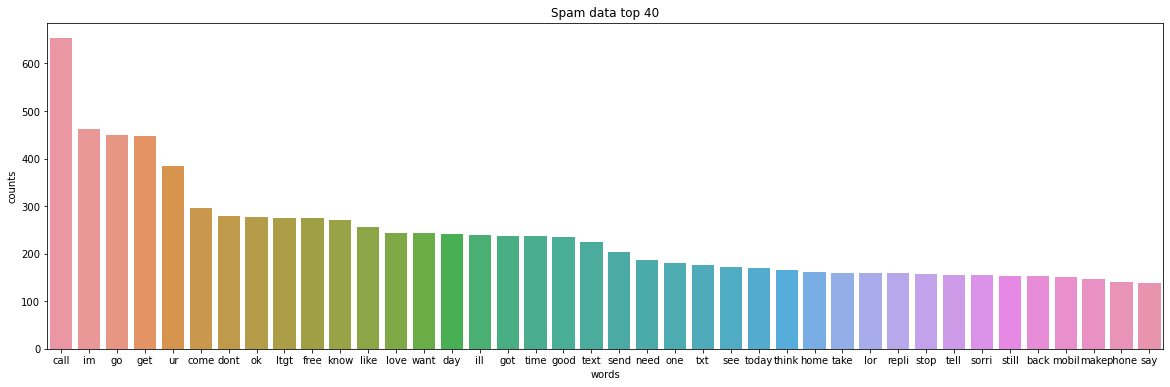

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,6))
sns.barplot('words', 'counts', data=spam_df, ax=ax)
plt.title("Spam data top 40")

In [21]:
# 많이 등장한 것들 중에 코사인 유사도 기반 'call' 토큰과 유사한 토큰 top10 뽑아보기
Cbow_model.most_similar('call', topn=10)

<ipython-input-21-6f13f196fe98>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  Cbow_model.most_similar('call', topn=10)


[('offici', 0.9999999403953552),
 ('saturday', 0.9999999403953552),
 ('refus', 0.9999999403953552),
 ('natur', 0.9999998211860657),
 ('order', 0.9999989867210388),
 ('remov', 0.9999988675117493),
 ('transact', 0.9999985694885254),
 ('tour', 0.9999980330467224),
 ('week', 0.9999980330467224),
 ('goto', 0.999997615814209)]

* 해석 1 : 가장 많이 나온단어는 call이고 CBOW 임베딩을 활용하여 찾은, call과 유사성이 깊은 단어들은 위와 같다. 

C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


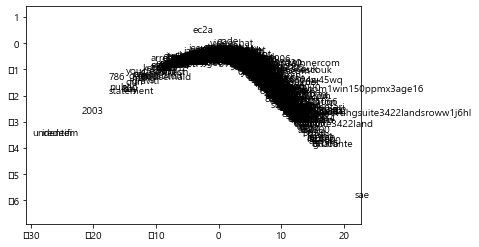

In [22]:
# 단어 임베딩 결과 시각화
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

plt.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [23]:
# 임베딩 모델로 Skip_Gram 모델 생성
Skip_Gram_model = Word2Vec(data, size=2, window=3, min_count=4, workers=1, iter=1000, sg=1)
#주변 3개의 단어로 중심단어를 맞출것이다.

In [24]:
#index2word는 모델의 사전에 있는 단어 명을 담은 리스트
words2 = Skip_Gram_model.wv.index2word # one-hot encoding 알아서 해줌 
words2

['call',
 'im',
 'go',
 'get',
 'ur',
 'come',
 'dont',
 'ok',
 'ltgt',
 'free',
 'know',
 'like',
 'love',
 'want',
 'day',
 'ill',
 'got',
 'time',
 'good',
 'text',
 'send',
 'need',
 'one',
 'txt',
 'see',
 'today',
 'think',
 'home',
 'take',
 'lor',
 'repli',
 'stop',
 'tell',
 'sorri',
 'still',
 'back',
 'mobil',
 'make',
 'phone',
 'say',
 'new',
 'week',
 'work',
 'pleas',
 'later',
 'well',
 'da',
 'ask',
 'hi',
 'miss',
 'meet',
 'hope',
 'cant',
 'happi',
 'night',
 'claim',
 'wait',
 'thing',
 'tri',
 'much',
 'great',
 'oh',
 'give',
 'hey',
 'pl',
 'dear',
 'wat',
 'messag',
 'number',
 'friend',
 'thank',
 'way',
 'prize',
 'right',
 'feel',
 'that',
 'msg',
 'let',
 'pick',
 'alreadi',
 'even',
 'tomorrow',
 'ye',
 'realli',
 'yeah',
 'said',
 'min',
 'babe',
 'leav',
 'co',
 'amp',
 'care',
 'morn',
 'win',
 'didnt',
 'last',
 'sure',
 'servic',
 'life',
 'would',
 'keep',
 'cash',
 'find',
 'year',
 'contact',
 'ive',
 'anyth',
 'buy',
 'sleep',
 'lol',
 'tone',
 'l

In [25]:
# text 토큰 임베딩 벡터
vectors2 = Skip_Gram_model.wv.vectors
vectors2

array([[-0.32986528, -1.0886296 ],
       [ 1.4899931 , -0.525059  ],
       [ 1.5566393 , -0.48200125],
       ...,
       [ 1.802848  , -0.5622501 ],
       [ 0.9328432 , -0.6424268 ],
       [ 0.4166385 , -0.7622667 ]], dtype=float32)

In [26]:
# 토큰과 벡터 묶기
Skip_Gram_result = dict(zip(words2, vectors2))

In [27]:
# 단어에 따른 임베딩 벡터 확인하기
w2v_df_sg = pd.DataFrame(vectors2, columns = ['x1', 'x2'])
w2v_df_sg['word'] = words2
w2v_df_sg = w2v_df_sg[['word', 'x1', 'x2']]
w2v_df_sg

,word,x1,x2
0,call,-0.329865,-1.088630
1,im,1.489993,-0.525059
2,go,1.556639,-0.482001
3,get,0.479022,-0.666555
4,ur,0.144082,-0.766469
...,...,...,...
1888,captain,3.410152,-0.492031
1889,mumtaz,0.603180,-0.652660
1890,taunton,1.802848,-0.562250
1891,loss,0.932843,-0.642427


In [31]:
# 많이 등장한 것들 중에 코사인 유사도 기반 'call' 토큰과 유사한 토큰 top10 뽑아보기
Skip_Gram_model.most_similar('call', topn=10)

[('rington', 1.0),
 ('enter', 0.9999999403953552),
 ('unlimit', 0.9999974966049194),
 ('price', 0.9999974370002747),
 ('opt', 0.9999973773956299),
 ('logo', 0.9999960064888),
 ('auction', 0.9999911189079285),
 ('club', 0.9999909400939941),
 ('tenant', 0.9999903440475464),
 ('euro2004', 0.9999861717224121)]

* 해석2 : 임베딩 모델로 Skip_Gram을 썼을때, 결과가 완전히 다르게 나왔다. CBOW는 동사느낌이 많이 뽑혀나왔다면 SkipGram에서는 명사?사물? 이런느낌의 단어가 많이 뽑혀나온것같다.

C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


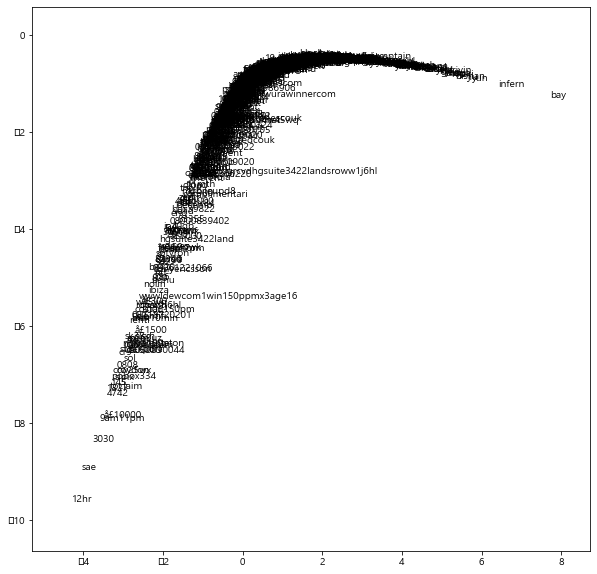

In [30]:
# 단어 임베딩 결과 시각화
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

plt.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df_sg['word'], w2v_df_sg['x1'], w2v_df_sg['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors2, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors2, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors2, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors2, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

* 해석2 : CBOW와 비교해보았을때 Skip_Gram이 좀더 직선의 모양을 띄고있는 것을 보아 비슷한 단어들끼리 더 잘 묶인것 같다. 

In [46]:
# 임베딩 모델로 FastText 모델 생성
# 존재하지 않았던 단어의 임베딩도 가능하고 희소한 단어에 대해서도 좋은 임베딩이 가능하다(w2v의 한계인 oov보완)
ft_model = FastText(data, size=2, window=3, min_count=4, workers=1, iter=1000)

In [47]:
#index2word는 모델의 사전에 있는 단어 명을 담은 리스트
words3 = ft_model.wv.index2word # one-hot encoding 알아서 해줌 
words3

['call',
 'im',
 'go',
 'get',
 'ur',
 'come',
 'dont',
 'ok',
 'ltgt',
 'free',
 'know',
 'like',
 'love',
 'want',
 'day',
 'ill',
 'got',
 'time',
 'good',
 'text',
 'send',
 'need',
 'one',
 'txt',
 'see',
 'today',
 'think',
 'home',
 'take',
 'lor',
 'repli',
 'stop',
 'tell',
 'sorri',
 'still',
 'back',
 'mobil',
 'make',
 'phone',
 'say',
 'new',
 'week',
 'work',
 'pleas',
 'later',
 'well',
 'da',
 'ask',
 'hi',
 'miss',
 'meet',
 'hope',
 'cant',
 'happi',
 'night',
 'claim',
 'wait',
 'thing',
 'tri',
 'much',
 'great',
 'oh',
 'give',
 'hey',
 'pl',
 'dear',
 'wat',
 'messag',
 'number',
 'friend',
 'thank',
 'way',
 'prize',
 'right',
 'feel',
 'that',
 'msg',
 'let',
 'pick',
 'alreadi',
 'even',
 'tomorrow',
 'ye',
 'realli',
 'yeah',
 'said',
 'min',
 'babe',
 'leav',
 'co',
 'amp',
 'care',
 'morn',
 'win',
 'didnt',
 'last',
 'sure',
 'servic',
 'life',
 'would',
 'keep',
 'cash',
 'find',
 'year',
 'contact',
 'ive',
 'anyth',
 'buy',
 'sleep',
 'lol',
 'tone',
 'l

In [48]:
# text 토큰 임베딩 벡터
vectors3 = ft_model.wv.vectors
vectors3

array([[-1.978516  ,  1.7145493 ],
       [ 4.590971  , -1.6865082 ],
       [ 4.1353636 , -1.6016811 ],
       ...,
       [ 2.9803042 , -0.82751995],
       [ 0.2456261 ,  0.5544226 ],
       [-1.7885028 ,  1.6385942 ]], dtype=float32)

In [49]:
# 토큰과 벡터 묶기
ft_model_result = dict(zip(words3, vectors3))

In [50]:
# 단어에 따른 임베딩 벡터 확인하기
ft_df = pd.DataFrame(vectors3, columns = ['x1', 'x2'])
ft_df['word'] = words3
ft_df = ft_df[['word', 'x1', 'x2']]
ft_df

,word,x1,x2
0,call,-1.978516,1.714549
1,im,4.590971,-1.686508
2,go,4.135364,-1.601681
3,get,-0.159041,0.611825
4,ur,-1.000760,1.031664
...,...,...,...
1888,captain,4.711835,-1.820900
1889,mumtaz,0.701504,0.055212
1890,taunton,2.980304,-0.827520
1891,loss,0.245626,0.554423


In [51]:
# 많이 등장한 것들 중에 코사인 유사도 기반 'call' 토큰과 유사한 토큰 top10 뽑아보기
ft_model.most_similar('call', topn=10)

[('renew', 0.9999997615814209),
 ('hol', 0.9999997615814209),
 ('text', 0.9999995231628418),
 ('seri', 0.9999989867210388),
 ('fa', 0.999998927116394),
 ('advis', 0.999998927116394),
 ('pc', 0.9999985694885254),
 ('remov', 0.9999984502792358),
 ('visit', 0.999998152256012),
 ('singl', 0.9999979734420776)]

* 또다른 느낌의 단어들이 등장했다..

In [57]:
# FastText의 장점인 없는단어를 넣었을떄도 실행이 되는지 해보았다.
ft_model.most_similar('banana', topn=10)

[('tho', 1.0),
 ('ru', 1.0),
 ('write', 1.0),
 ('greet', 1.0),
 ('hey', 1.0),
 ('worri', 1.0),
 ('student', 0.9999999403953552),
 ('teas', 0.9999999403953552),
 ('yeah', 0.9999999403953552),
 ('clock', 0.9999999403953552)]

* 위의 것들은 없는단어를 치면 에러가 나오는데 fastText는 실행이된다!!

C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Cute\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


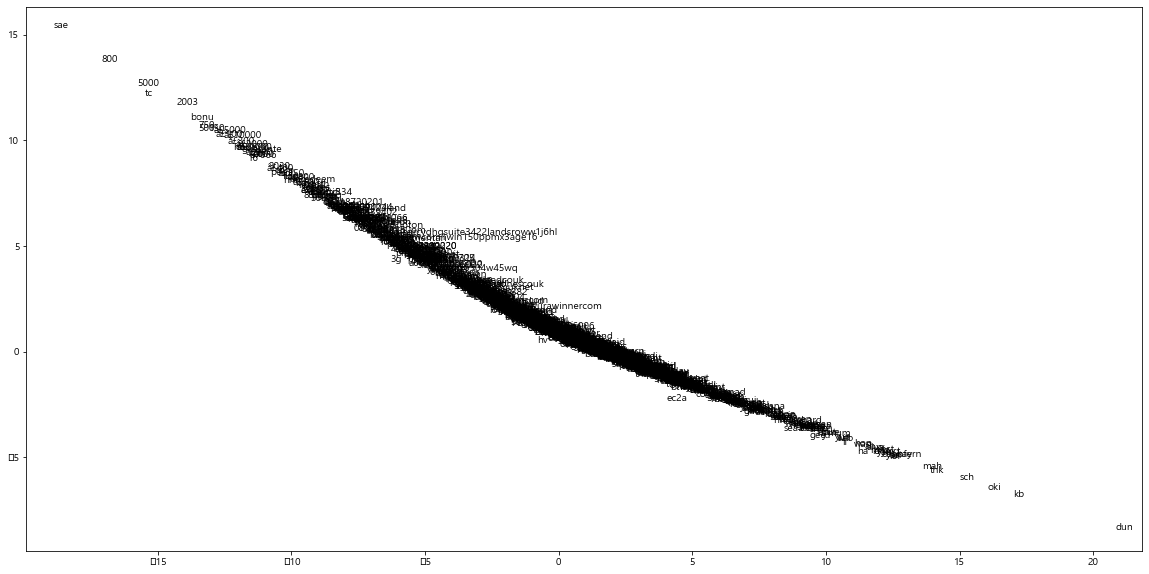

In [52]:
# 단어 임베딩 결과 시각화
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

plt.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()

for word, x1, x2 in zip(ft_df['word'], ft_df['x1'], ft_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors3, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors3, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors3, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors3, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

* 해석3 : FastText는 위의 w2v의 결과들과 완전다르게 나왔다. y = -x+b 느낌이다. 전체적으로 반대의 의미를 가지고 있는 단어들과 묶인것일까..? 
* CBOW, SKip_Gram, FastText 중에서 유사도와 시각화한 그림을 보았을 때, skip_gram이 제일 좋아보이는것 같다!

* CountVectorizer, tf-idf, 나이브베이즈 모델을 활용하여 이진분류를 해보았다.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
pipeline = Pipeline([
    ('vectorization', CountVectorizer(analyzer=process_text)), #문서에서 토큰을 생성,각 단어의 수를 세어 인코딩한 벡터를 만듬
    ('tfidf', TfidfTransformer()),  #tf-idf 사용
    ('classifier', MultinomialNB()) #분류기로 나이브베이즈 사용
])

In [37]:
train_x, test_x, train_y, test_y = train_test_split(spam['v2'], spam['v1'], test_size=0.2)
pipeline.fit(train_x, train_y)

Pipeline(steps=[('vectorization',
                 CountVectorizer(analyzer=<function process_text at 0x0000011DC1438CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

['ham' 'spam' 'ham' ... 'ham' 'ham' 'spam']
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       980
        spam       1.00      0.75      0.86       135

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.97      1115



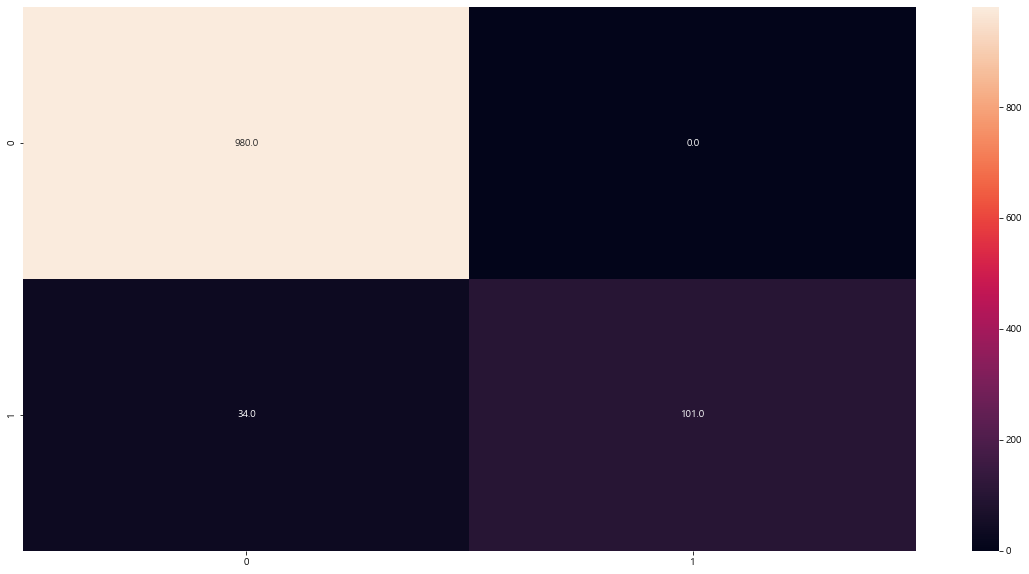

In [40]:
#테스트데이터를 이용해 성능평가 
pred_y = pipeline.predict(test_x)

print(pred_y)
print(classification_report(test_y, pred_y))
#테스트결과를 시각화한것 
sns.heatmap(confusion_matrix(test_y, pred_y), fmt='.1f', annot=True)

* 해석4 : 정확도가 0.97이고 다른수치들도 나쁘지 않은것같다. tf-idf가 잘 처리하는것 같다!